In [1]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./datasets/15_retweet_text_tfidf_robert_version.csv', sep=',', encoding='utf8')
print(data.columns)

data_selected = data.loc[:, 'feature_0':]
print(data_selected.shape)
print(data_selected.columns)

Index(['Unnamed: 0', 'is_RT', 'retweet_from', 'whole_tweet_text',
       'original_text', 'retweet_text', 'stopwords_removed_retweet_text',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_2416', 'feature_2417', 'feature_2418', 'feature_2419',
       'feature_2420', 'feature_2421', 'feature_2422', 'feature_2423',
       'feature_2424', 'feature_2425'],
      dtype='object', length=2433)
(610, 2426)
Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_2416', 'feature_2417', 'feature_2418', 'feature_2419',
       'feature_2420', 'feature_2421', 'feature_2422', 'feature_2423',
       'feature_2424', 'feature_2425'],
      dtype='object', length=2426)


# TruncatedSVD

In [7]:
# perform TruncatedSVD
svd = TruncatedSVD(n_components=500, n_iter=10, random_state=100)
svd.fit(data_selected)

print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)
print(svd.singular_values_)

# fit transform the data
data_svd = svd.fit_transform(data_selected)

0.9470504971579873
[0.01392906 0.00913165 0.00850565 0.00788604 0.00765054 0.00709033
 0.00677471 0.00642576 0.00617695 0.0058624  0.00560722 0.00538391
 0.00505482 0.00496197 0.00475879 0.00465948 0.00462258 0.0043304
 0.00426393 0.00426087 0.00422872 0.00416271 0.00414914 0.00401857
 0.00399515 0.00394171 0.00387973 0.00383892 0.00379454 0.0037761
 0.00374788 0.00369531 0.00367473 0.00363042 0.00358938 0.00353395
 0.00349682 0.00347768 0.00346079 0.00343794 0.00342566 0.00336198
 0.00335367 0.00333427 0.00331437 0.00328873 0.00325224 0.00323808
 0.00322202 0.0032101  0.00317789 0.00314081 0.00311377 0.00308181
 0.00304509 0.00304489 0.00302106 0.00299661 0.00296445 0.00296329
 0.00293796 0.00293168 0.00292153 0.00289632 0.00287626 0.00285534
 0.00283661 0.00282235 0.00279363 0.0027748  0.00275153 0.00274913
 0.00273975 0.00273276 0.0027223  0.00268939 0.00266617 0.0026467
 0.00264488 0.00262391 0.0026167  0.00259136 0.00258608 0.00257938
 0.00255484 0.00254987 0.00252993 0.00250853 0

# DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

In [16]:
clustering = DBSCAN(eps=1, min_samples=2, algorithm='ball_tree').fit(data_svd)
print(clustering.labels_)
print(clustering)
print(set(clustering.labels_.tolist()))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
  1  2 -1 -1 -1  2 -1 -1 -1 -1  1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  4 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6  6  6  7  7  7  7  7  8
  7 -1  9 -1 10 -1 -1  7  8  8  8 -1 11  9 -1  7 -1  7  7 -1  7  7 -1 -1
 -1 -1 -1  7 12  7  7 13 10 13 14  7 15 -1 15 16  7 -1 -1 -1  7 11 -1 17
 -1 11  7  7 18 -1 14  7 13 -1 -1  7 19 -1 -1  7 18  7  7  7 -1  7 17  7
 -1 -1 -1  7 -1 -1 -1 20 -1 21 12  7 -1 -1 -1 -1  7 -1 22  7 -1 -1 -1 -1
 -1 23 22 -1 -1 -1 -1 -1 24 19 -1  7 -1 -1 -1 -1 14 -1 -1 -1 -1 -1 -1 21
 -1 25 19 19 25 24 -1 -1 -1  7 -1 -1 -1 -1 -1 26 -1 -1 -1 -1 -1 -1  7 27
 -1 -1 -1 -1  7  4 23 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 28 29 30 -1
 -1 -1 31 28 -1 -1 28 28 -1 -1 -1 -1 -1 -1  7 20 -1 -1 -1 -1  7 -1  7 -1
 -1 -1 -1  7  7 30 -1 -1 32  7 19 33 -1 -1 16 -1 -1

# Graph out result

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [7]:
# compress the data using tdidf vector

# perform TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=100)
svd.fit(data_selected)

print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)
print(svd.singular_values_)

# fit transform the data
data_graph = svd.fit_transform(data_selected)

print(data_graph[:10])

0.023060546108608464
[0.01392906 0.00913149]
[4.22861194 2.40685328]
[[ 0.0705522  -0.1194539 ]
 [ 0.06437788 -0.12703917]
 [ 0.03062635 -0.06781766]
 [ 0.02252675 -0.04455517]
 [ 0.11338845  0.0534507 ]
 [ 0.05996616  0.02248409]
 [ 0.05873033  0.02093971]
 [ 0.03739607  0.0026585 ]
 [ 0.00678887 -0.01062816]
 [ 0.00886205 -0.0107663 ]]


In [8]:
data_pred = pd.DataFrame(data=data_graph,
                        columns=['PC1', 'PC2'])

data_pred.loc[:, 'Pred'] = clustering.labels_

print(data_pred.head())

        PC1       PC2  Pred
0  0.070552 -0.119454    -1
1  0.064378 -0.127039    -1
2  0.030626 -0.067818    -1
3  0.022527 -0.044555    -1
4  0.113388  0.053451    -1


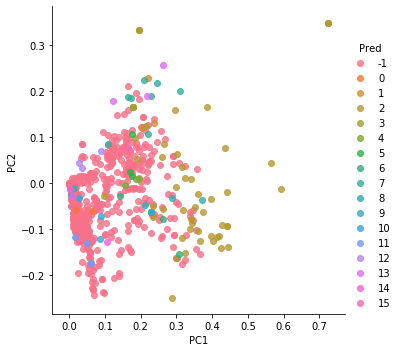

In [9]:
# graph out the result

facet = sns.lmplot(data=data_pred, x='PC1', y='PC2', hue='Pred',
                  fit_reg=False, legend=True, legend_out=True)

# Concat the data back to original dataset

In [10]:
output = pd.concat([data, data_pred], axis=1)
print(output.shape)

output.to_csv("./predictions/retweet_DBSCAN_predictions.csv", sep='\t',
             encoding='utf8', index=None)

(610, 2436)
